In [1]:
import warnings
warnings.filterwarnings("ignore")

from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import praw

In [2]:
user_agent = "Scraper 1.0 by /u/parivesh1210"

In [3]:
reddit = praw.Reddit(
 client_id = "BH_KHmM10dids4AWh6mR2w",
 client_secret = "n4UUYM356Wf9zwSu143bxcId5Mlqiw",
 user_agent = user_agent,
 username = "parivesh1210",
 password = "paripari"
)

In [4]:
print(reddit.user.me())

parivesh1210


In [5]:
# The topic that we want to search for
topicName = "stocks"

In [6]:
# We can use hot or new or rising or top, see the examples
from datetime import datetime

subreddit = reddit.subreddit(topicName)

for submission in subreddit.hot(limit = 10):
    print(submission.title)
    print(submission.id)
    print(submission.author)
    print(datetime.utcfromtimestamp(submission.created_utc).strftime('%Y-%m-%d'))
    print(submission.score)
    print(submission.upvote_ratio)
    print(submission.url)
    print(submission.num_comments)

Rate My Portfolio - r/Stocks Quarterly Thread June 2024
1d5itn0
AutoModerator
2024-06-01
47
0.92
https://www.reddit.com/r/stocks/comments/1d5itn0/rate_my_portfolio_rstocks_quarterly_thread_june/
344
r/Stocks Daily Discussion Monday - Jul 08, 2024
1dy4now
AutoModerator
2024-07-08
4
0.75
https://www.reddit.com/r/stocks/comments/1dy4now/rstocks_daily_discussion_monday_jul_08_2024/
23
Boeing to plead guilty to criminal fraud charge stemming from 737 Max crashes 
1dy5jf3
Puginator
2024-07-08
180
0.96
https://www.reddit.com/r/stocks/comments/1dy5jf3/boeing_to_plead_guilty_to_criminal_fraud_charge/
39
HUGE LOSS. Husband used Motley Fool to change my index funded retirement account to stock picking, help!
1dxht2p
Sad-Number-6575
2024-07-07
985
0.9
https://www.reddit.com/r/stocks/comments/1dxht2p/huge_loss_husband_used_motley_fool_to_change_my/
765
Paramount agrees to merge with Skydance 
1dy83ov
Puginator
2024-07-08
14
1.0
https://www.reddit.com/r/stocks/comments/1dy83ov/paramount_agrees_to_me

In [7]:
# We can use hot or new or rising or top
submissions = set()

posts = subreddit.hot(limit=None)

# Just add up all the headlines of the reddits into a set
for submission in posts:
    submissions.add(submission)

print(len(submissions))

241


In [8]:
headlines = []

for submission in submissions:    
    headlines.append([submission.title, submission.num_comments, submission.score, submission.upvote_ratio, datetime.utcfromtimestamp(submission.created_utc)])

In [9]:
df = pd.DataFrame(headlines)

In [10]:
df.columns = ["Title", "Number of Comments", "Score", "Upvote-Ratio", "DateTime"]

df.head()

,Title,Number of Comments,Score,Upvote-Ratio,DateTime
0,IBIT to BTC price?,5,0,0.46,2024-07-07 19:13:34
1,2 ways to play the CMG split next week,28,7,0.59,2024-06-22 12:48:48
2,Long term investment risk in the US market?,77,0,0.40,2024-06-29 14:22:07
3,"r/Stocks Daily Discussion Monday - Jul 08, 2024",23,6,0.87,2024-07-08 09:30:09
4,USD & Semiconductor ETF’s,24,0,0.37,2024-06-30 18:08:48


In [11]:
import regex as re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

In [12]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91934\anaconda3\pkgs...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91934\anaconda3\pkgs...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91934\anaconda3\pkgs...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91934\anaconda3\pkgs...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [13]:
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

In [14]:
# Cleaning the text in the review column
df['Cleaned Title'] = df['Title'].apply(clean)
df.head()

,Title,Number of Comments,Score,Upvote-Ratio,DateTime,Cleaned Title
0,IBIT to BTC price?,5,0,0.46,2024-07-07 19:13:34,IBIT to BTC price
1,2 ways to play the CMG split next week,28,7,0.59,2024-06-22 12:48:48,ways to play the CMG split next week
2,Long term investment risk in the US market?,77,0,0.40,2024-06-29 14:22:07,Long term investment risk in the US market
3,"r/Stocks Daily Discussion Monday - Jul 08, 2024",23,6,0.87,2024-07-08 09:30:09,r Stocks Daily Discussion Monday Jul
4,USD & Semiconductor ETF’s,24,0,0.37,2024-06-30 18:08:48,USD Semiconductor ETF s


In [15]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

In [16]:
df['POS tagged'] = df['Cleaned Title'].apply(token_stop_pos)
df.head()

,Title,Number of Comments,Score,Upvote-Ratio,DateTime,Cleaned Title,POS tagged
0,IBIT to BTC price?,5,0,0.46,2024-07-07 19:13:34,IBIT to BTC price,"[(IBIT, n), (BTC, n), (price, n)]"
1,2 ways to play the CMG split next week,28,7,0.59,2024-06-22 12:48:48,ways to play the CMG split next week,"[(ways, n), (play, v), (CMG, n), (split, n), (..."
2,Long term investment risk in the US market?,77,0,0.40,2024-06-29 14:22:07,Long term investment risk in the US market,"[(Long, a), (term, n), (investment, n), (risk,..."
3,"r/Stocks Daily Discussion Monday - Jul 08, 2024",23,6,0.87,2024-07-08 09:30:09,r Stocks Daily Discussion Monday Jul,"[(r, n), (Stocks, n), (Daily, n), (Discussion,..."
4,USD & Semiconductor ETF’s,24,0,0.37,2024-06-30 18:08:48,USD Semiconductor ETF s,"[(USD, n), (Semiconductor, n), (ETF, n)]"


In [17]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [18]:
df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,Title,Number of Comments,Score,Upvote-Ratio,DateTime,Cleaned Title,POS tagged,Lemma
0,IBIT to BTC price?,5,0,0.46,2024-07-07 19:13:34,IBIT to BTC price,"[(IBIT, n), (BTC, n), (price, n)]",IBIT BTC price
1,2 ways to play the CMG split next week,28,7,0.59,2024-06-22 12:48:48,ways to play the CMG split next week,"[(ways, n), (play, v), (CMG, n), (split, n), (...",way play CMG split next week
2,Long term investment risk in the US market?,77,0,0.40,2024-06-29 14:22:07,Long term investment risk in the US market,"[(Long, a), (term, n), (investment, n), (risk,...",Long term investment risk US market
3,"r/Stocks Daily Discussion Monday - Jul 08, 2024",23,6,0.87,2024-07-08 09:30:09,r Stocks Daily Discussion Monday Jul,"[(r, n), (Stocks, n), (Daily, n), (Discussion,...",r Stocks Daily Discussion Monday Jul
4,USD & Semiconductor ETF’s,24,0,0.37,2024-06-30 18:08:48,USD Semiconductor ETF s,"[(USD, n), (Semiconductor, n), (ETF, n)]",USD Semiconductor ETF


In [19]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    
# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

In [20]:
# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [21]:
df['Subjectivity'] = df['Lemma'].apply(getSubjectivity) 
df['Polarity'] = df['Lemma'].apply(getPolarity) 
df['Analysis'] = df['Polarity'].apply(analysis)
df.head()

,Title,Number of Comments,Score,Upvote-Ratio,DateTime,Cleaned Title,POS tagged,Lemma,Subjectivity,Polarity,Analysis
0,IBIT to BTC price?,5,0,0.46,2024-07-07 19:13:34,IBIT to BTC price,"[(IBIT, n), (BTC, n), (price, n)]",IBIT BTC price,0.0,0.00,Neutral
1,2 ways to play the CMG split next week,28,7,0.59,2024-06-22 12:48:48,ways to play the CMG split next week,"[(ways, n), (play, v), (CMG, n), (split, n), (...",way play CMG split next week,0.0,0.00,Neutral
2,Long term investment risk in the US market?,77,0,0.40,2024-06-29 14:22:07,Long term investment risk in the US market,"[(Long, a), (term, n), (investment, n), (risk,...",Long term investment risk US market,0.4,-0.05,Negative
3,"r/Stocks Daily Discussion Monday - Jul 08, 2024",23,6,0.87,2024-07-08 09:30:09,r Stocks Daily Discussion Monday Jul,"[(r, n), (Stocks, n), (Daily, n), (Discussion,...",r Stocks Daily Discussion Monday Jul,0.0,0.00,Neutral
4,USD & Semiconductor ETF’s,24,0,0.37,2024-06-30 18:08:48,USD Semiconductor ETF s,"[(USD, n), (Semiconductor, n), (ETF, n)]",USD Semiconductor ETF,0.0,0.00,Neutral


In [22]:
tb_counts = df.Analysis.value_counts()

tb_counts

Neutral     168
Positive     51
Negative     22
Name: Analysis, dtype: int64

In [23]:
# Since the first row is a clear outlier, lets remove it, also, we can work on a better algorithm to remove outliers

# Calculate the time differences between consecutive datetime values
df['Time_Diff'] = df['DateTime'].diff().dt.total_seconds().fillna(0)

# Calculate Z-score for the time differences
threshold = 2  # Set your threshold value for Z-score, e.g., 2 or 3
df['Time_Diff_Zscore'] = np.abs((df['Time_Diff'] - df['Time_Diff'].mean()) / df['Time_Diff'].std())

# Remove rows with time differences considered as outliers
df_cleaned = df[df['Time_Diff_Zscore'] <= threshold]

# Drop the intermediate columns if not needed
df_cleaned = df_cleaned.drop(['Time_Diff', 'Time_Diff_Zscore'], axis=1)

df_cleaned

,Title,Number of Comments,Score,Upvote-Ratio,DateTime,Cleaned Title,POS tagged,Lemma,Subjectivity,Polarity,Analysis
0,IBIT to BTC price?,5,0,0.46,2024-07-07 19:13:34,IBIT to BTC price,"[(IBIT, n), (BTC, n), (price, n)]",IBIT BTC price,0.00,0.00,Neutral
2,Long term investment risk in the US market?,77,0,0.40,2024-06-29 14:22:07,Long term investment risk in the US market,"[(Long, a), (term, n), (investment, n), (risk,...",Long term investment risk US market,0.40,-0.05,Negative
3,"r/Stocks Daily Discussion Monday - Jul 08, 2024",23,6,0.87,2024-07-08 09:30:09,r Stocks Daily Discussion Monday Jul,"[(r, n), (Stocks, n), (Daily, n), (Discussion,...",r Stocks Daily Discussion Monday Jul,0.00,0.00,Neutral
4,USD & Semiconductor ETF’s,24,0,0.37,2024-06-30 18:08:48,USD Semiconductor ETF s,"[(USD, n), (Semiconductor, n), (ETF, n)]",USD Semiconductor ETF,0.00,0.00,Neutral
5,DocuSign DOCU,14,10,0.66,2024-07-01 19:54:32,DocuSign DOCU,"[(DocuSign, n), (DOCU, n)]",DocuSign DOCU,0.00,0.00,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
236,ETF: big differences from one broker to another,1,2,0.60,2024-06-25 22:10:59,ETF big differences from one broker to another,"[(ETF, n), (big, a), (differences, n), (one, N...",ETF big difference one broker another,0.10,0.00,Neutral
237,"r/Stocks Daily Discussion Monday - Jun 24, 2024",259,9,0.74,2024-06-24 09:30:09,r Stocks Daily Discussion Monday Jun,"[(r, n), (Stocks, n), (Daily, n), (Discussion,...",r Stocks Daily Discussion Monday Jun,0.00,0.00,Neutral
238,Netflix Launches Its Own Line of Popcorn for $...,149,477,0.82,2024-06-21 00:56:58,Netflix Launches Its Own Line of Popcorn for a...,"[(Netflix, n), (Launches, n), (Line, n), (Popc...",Netflix Launches Line Popcorn Bag,0.00,0.00,Neutral
239,r/Stocks Weekly Thread on Meme Stocks Saturday...,0,7,0.77,2024-06-29 16:00:20,r Stocks Weekly Thread on Meme Stocks Saturday...,"[(r, n), (Stocks, n), (Weekly, n), (Thread, n)...",r Stocks Weekly Thread Meme Stocks Saturday Jun,0.00,0.00,Neutral


In [24]:
df = df_cleaned.sort_values('DateTime')

df

,Title,Number of Comments,Score,Upvote-Ratio,DateTime,Cleaned Title,POS tagged,Lemma,Subjectivity,Polarity,Analysis
238,Netflix Launches Its Own Line of Popcorn for $...,149,477,0.82,2024-06-21 00:56:58,Netflix Launches Its Own Line of Popcorn for a...,"[(Netflix, n), (Launches, n), (Line, n), (Popc...",Netflix Launches Line Popcorn Bag,0.000,0.00,Neutral
64,Why is there no sober analysis on NVIDIA and AI?,229,206,0.83,2024-06-21 06:45:18,Why is there no sober analysis on NVIDIA and AI,"[(sober, n), (analysis, n), (NVIDIA, n), (AI, n)]",sober analysis NVIDIA AI,0.200,0.10,Positive
133,Hertz Sells $750 Million of Bonds to Strengthe...,14,68,0.89,2024-06-21 08:10:08,Hertz Sells Million of Bonds to Strengthen Fin...,"[(Hertz, n), (Sells, n), (Million, n), (Bonds,...",Hertz Sells Million Bonds Strengthen Finances,0.000,0.00,Neutral
144,"Regulators hit Citigroup, JPMorgan Chase, Gold...",6,57,0.88,2024-06-21 18:30:21,Regulators hit Citigroup JPMorgan Chase Goldma...,"[(Regulators, n), (hit, v), (Citigroup, n), (J...",Regulators hit Citigroup JPMorgan Chase Gold...,0.000,0.00,Neutral
63,Energy Stocks Powering AI,49,55,0.93,2024-06-21 20:01:41,Energy Stocks Powering AI,"[(Energy, n), (Stocks, n), (Powering, n), (AI,...",Energy Stocks Powering AI,0.000,0.00,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
3,"r/Stocks Daily Discussion Monday - Jul 08, 2024",23,6,0.87,2024-07-08 09:30:09,r Stocks Daily Discussion Monday Jul,"[(r, n), (Stocks, n), (Daily, n), (Discussion,...",r Stocks Daily Discussion Monday Jul,0.000,0.00,Neutral
226,Boeing to plead guilty to criminal fraud charg...,39,181,0.96,2024-07-08 10:29:05,Boeing to plead guilty to criminal fraud charg...,"[(Boeing, v), (plead, v), (guilty, a), (crimin...",Boeing plead guilty criminal fraud charge st...,0.775,-0.45,Negative
87,How has virtually every stock exponentially gr...,18,0,0.17,2024-07-08 12:29:09,How has virtually every stock exponentially gr...,"[(virtually, r), (every, None), (stock, n), (e...",virtually every stock exponentially grown si...,0.000,0.00,Neutral
68,Paramount agrees to merge with Skydance,3,15,0.95,2024-07-08 12:49:12,Paramount agrees to merge with Skydance,"[(Paramount, n), (agrees, v), (merge, v), (Sky...",Paramount agree merge Skydance,0.000,0.00,Neutral


In [25]:
startDateOfPosts = min(df["DateTime"])
endDateOfPosts = max(df["DateTime"])

In [26]:
import yfinance as yf

#define the ticker symbol
tickerSymbol = 'DJIA'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(start = startDateOfPosts, end = endDateOfPosts)

#see your data
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-06-21 00:00:00-04:00,22.041956,22.131557,21.982222,22.032000,16700,0.000,0.0,0.0
2024-06-24 00:00:00-04:00,22.160000,22.209999,22.080000,22.190001,24400,0.098,0.0,0.0
2024-06-25 00:00:00-04:00,22.090000,22.129999,22.020000,22.030001,26200,0.000,0.0,0.0
2024-06-26 00:00:00-04:00,22.090000,22.129999,22.020000,22.120001,19500,0.000,0.0,0.0
2024-06-27 00:00:00-04:00,22.180000,22.180000,22.025999,22.059999,29600,0.000,0.0,0.0
2024-06-28 00:00:00-04:00,22.059999,22.200001,22.049999,22.100000,17800,0.000,0.0,0.0
2024-07-01 00:00:00-04:00,22.170000,22.240000,22.049999,22.180000,20100,0.000,0.0,0.0
2024-07-02 00:00:00-04:00,22.170000,22.209999,22.070000,22.139999,30300,0.000,0.0,0.0
2024-07-03 00:00:00-04:00,22.070000,22.221001,22.070000,22.150000,17300,0.000,0.0,0.0


# Purpose is to first change the closing prices wrt previous, i.e., up or down

In [28]:
# Calculate the difference between consecutive closing prices
tickerDf['Price_Diff'] = tickerDf['Close'].diff()

# Map the difference to indicate increase, decrease, or no change
tickerDf['Price_Change'] = tickerDf['Price_Diff'].apply(lambda x: 2 if x > 0 else (0 if x < 0 else 1))

# Drop the 'Price_Diff' column if not needed
tickerDf.drop('Price_Diff', axis=1, inplace=True)

In [29]:
# Removing first row as we're basically just differencing the consecutive column values and the first row doesn't have any predescessor
tickerDf = tickerDf.iloc[1:]

In [30]:
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Price_Change
Date,,,,,,,,,
2024-06-24 00:00:00-04:00,22.160000,22.209999,22.080000,22.190001,24400,0.098,0.0,0.0,2
2024-06-25 00:00:00-04:00,22.090000,22.129999,22.020000,22.030001,26200,0.000,0.0,0.0,0
2024-06-26 00:00:00-04:00,22.090000,22.129999,22.020000,22.120001,19500,0.000,0.0,0.0,2
2024-06-27 00:00:00-04:00,22.180000,22.180000,22.025999,22.059999,29600,0.000,0.0,0.0,0
2024-06-28 00:00:00-04:00,22.059999,22.200001,22.049999,22.100000,17800,0.000,0.0,0.0,2
2024-07-01 00:00:00-04:00,22.170000,22.240000,22.049999,22.180000,20100,0.000,0.0,0.0,2
2024-07-02 00:00:00-04:00,22.170000,22.209999,22.070000,22.139999,30300,0.000,0.0,0.0,0
2024-07-03 00:00:00-04:00,22.070000,22.221001,22.070000,22.150000,17300,0.000,0.0,0.0,2
2024-07-05 00:00:00-04:00,22.260000,22.280001,22.160000,22.230000,21400,0.000,0.0,0.0,2


In [31]:
df.rename(columns={'Number of Comments': 'NumberofComments'}, inplace=True)

In [32]:
start_points = tickerDf.index.tz_localize(None)

# Create an empty DataFrame to store the accumulated data
columns_to_accumulate = ['Polarity', 'NumberofComments', 'Subjectivity', 'Score']
accumulated_df = pd.DataFrame(columns=columns_to_accumulate)
accumulated_data = {}  


# Loop through start points
for start_point in start_points:
    
    # Redefine the dictionary for each start point
    for col in columns_to_accumulate:
        accumulated_data[col] = 0
    
    # Accumulate columns until reaching the start point
    for index, row in df.iterrows():
        if row['DateTime'] >= start_point:
            break
        
        # Accumulate each column
        for col in columns_to_accumulate:
            accumulated_data[col] += row[col]
    
    # Create a new row in the accumulated DataFrame with the accumulated data
    new_row = pd.DataFrame([accumulated_data])
    accumulated_df = pd.concat([accumulated_df, new_row], ignore_index = True)

    # Reset accumulated_data to zero for the next iteration
    # accumulated_data = {col: 0 if col != 'Lemma' else '' for col in columns_to_accumulate}

# Display the accumulated DataFrame
print(accumulated_df)

    Polarity NumberofComments Subjectivity  Score
0   0.058333             2663         2.45   2800
1   0.770833             3939     6.691071   4620
2   0.350833             5397     9.786071   6962
3   0.359167             6616    13.394405   8402
4  -0.234015             7696    15.005768  10459
5   2.707652            10733    20.318268  12737
6   4.660032            12644    24.520649  14169
7   7.097532            13603    27.750858  16231
8   9.855786            16245    33.222366  19237
9  14.423948            19373    40.356404  21830


In [33]:
columns_to_diff = ['Polarity', 'NumberofComments', 'Subjectivity', 'Score']

# Calculate differences but retain the first row unchanged
posts_data_diff = accumulated_df[columns_to_diff].diff()
posts_data_diff.iloc[0] = accumulated_df.iloc[0][columns_to_diff]

In [34]:
print(posts_data_diff)

   Polarity NumberofComments Subjectivity Score
0  0.058333             2663         2.45  2800
1    0.7125             1276     4.241071  1820
2     -0.42             1458        3.095  2342
3  0.008333             1219     3.608333  1440
4 -0.593182             1080     1.611364  2057
5  2.941667             3037       5.3125  2278
6  1.952381             1911     4.202381  1432
7    2.4375              959     3.230208  2062
8  2.758254             2642     5.471508  3006
9  4.568162             3128     7.134039  2593


In [35]:
# Split the data into features and target variable
X = posts_data_diff[["NumberofComments", "Score", "Polarity", "Subjectivity"]]
Y = tickerDf["Price_Change"]

In [36]:
X

,NumberofComments,Score,Polarity,Subjectivity
0,2663,2800,0.058333,2.45
1,1276,1820,0.7125,4.241071
2,1458,2342,-0.42,3.095
3,1219,1440,0.008333,3.608333
4,1080,2057,-0.593182,1.611364
5,3037,2278,2.941667,5.3125
6,1911,1432,1.952381,4.202381
7,959,2062,2.4375,3.230208
8,2642,3006,2.758254,5.471508
9,3128,2593,4.568162,7.134039


In [37]:
Y

Date
2024-06-24 00:00:00-04:00    2
2024-06-25 00:00:00-04:00    0
2024-06-26 00:00:00-04:00    2
2024-06-27 00:00:00-04:00    0
2024-06-28 00:00:00-04:00    2
2024-07-01 00:00:00-04:00    2
2024-07-02 00:00:00-04:00    0
2024-07-03 00:00:00-04:00    2
2024-07-05 00:00:00-04:00    2
2024-07-08 00:00:00-04:00    2
Name: Price_Change, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [40]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(len(X.columns),)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # Using softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using training data
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 190.1175 - accuracy: 0.3333 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 62ms/step - loss: 141.2858 - accuracy: 0.5000 - val_loss: 19.4788 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 82ms/step - loss: 51.7846 - accuracy: 0.3333 - val_loss: 69.0007 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 72ms/step - loss: 22.3882 - accuracy: 0.8333 - val_loss: 114.0710 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 70ms/step - loss: 43.5690 - accuracy: 0.5000 - val_loss: 152.7916 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 66ms/step - loss: 108.7800 - accuracy: 0.6667 - val_loss: 191.7645 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 66ms/step - loss: 48.3062 - accuracy: 0.6667 - val_loss: 228.1346 - val

In [42]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Get predictions for the test set
predictions = np.argmax(model.predict(X_test), axis=-1)

# Calculate F1 score
f1 = f1_score(y_test, predictions, average='weighted')
print(f"Test F1 Score: {f1}")

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

1/1 [==============================] - 0s 156ms/step
Test F1 Score: 0.3333333333333333
Confusion Matrix:
[[0 1]
 [0 1]]


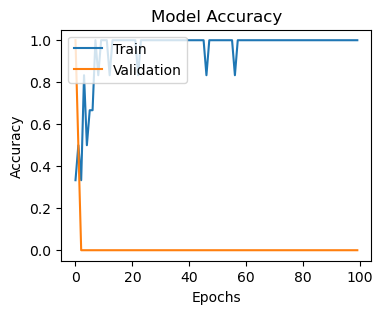

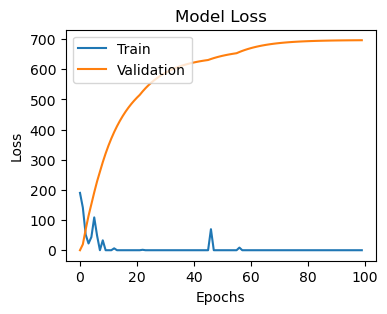

In [43]:
# Plot training & validation accuracy values
plt.figure(figsize=(4, 3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(4, 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

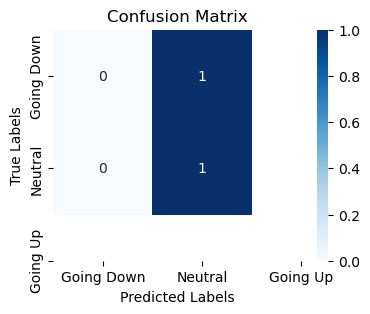

In [45]:
# Define class labels
class_labels = ['Going Down', 'Neutral', 'Going Up']  # Replace with your class labels

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Create a heatmap for the confusion matrix with specified class labels
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()